## Medical Device Recalls

### Step 4 - Machine Learning with Scikit-learn

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df_features = pd.read_csv("./data/prepared/features_tfidf.csv")

df_features.shape

(6904, 500)

In [4]:
df_features.sample(5)

,00,01,06,09,10,11,2018,2020,2021,2022,...,ventilation,ventilator,version,versions,vitros,void,volume,water,wear,wire
1231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_source = pd.read_csv("./data/source/enforcement_reports.csv")

df_labels = df_source[["classification"]]

df_labels.shape


(6904, 1)

In [6]:
df_labels.sample(5)

,classification
4054,Class II
5797,Class II
5212,Class II
4585,Class II
5528,Class III


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_labels, test_size = 0.2, random_state=50)

model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted


c:\WANG\PY\nlp_ml\.venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Class II', 'Class II', 'Class II', ..., 'Class II', 'Class II',
       'Class I'], dtype=object)

In [12]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

     Class I       0.96      0.46      0.63        97
    Class II       0.94      1.00      0.97      1249
   Class III       1.00      0.14      0.25        35

    accuracy                           0.94      1381
   macro avg       0.97      0.54      0.61      1381
weighted avg       0.94      0.94      0.93      1381



In [21]:
cm = confusion_matrix(y_test, y_predicted, labels=model.classes_)

print(cm)

[[  45   52    0]
 [   2 1247    0]
 [   0   30    5]]


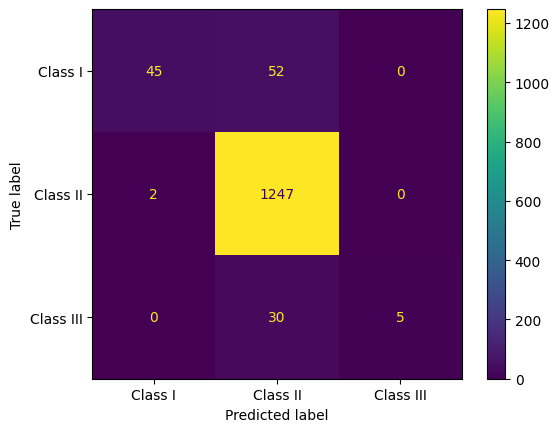

In [17]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()